In [1]:
import numpy as np
import keras as ks
import pickle
import os
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model_less=ks.models.load_model("./mymodel_imgcapt_less.h5")
print(1,end=" ")
model_more=ks.models.load_model("./mymodel_imgcapt_more.h5")
print(2,end=" ")
file_more=open("./mappings_more.pickle","rb")
print(3,end=" ")
file_less=open("./mappings_less.pickle","rb")
print(4,end=" ")
mapping_less,demapping_less=pickle.load(file_less)
print(5,end=" ")
mapping_more,demapping_more=pickle.load(file_more)
print(6,end=" ")
feature_ex=ks.applications.VGG16(True,"imagenet")
feature_ex.layers.pop()
feature_ex = ks.models.Model(inputs=feature_ex.inputs, outputs=feature_ex.layers[-1].output)
print(7,end=" ")
train_ids=open("captions"+'/Flickr_8k.trainImages.txt','r')
train_ids=train_ids.read()
train_ids=train_ids.strip().split('\n')
print(8)

1 2 3 4 5 6 7 8


In [58]:


def get_features(path,ids):
    features={}
    for i in ids:
        image=cv2.imread(path+"/"+i)
        image=cv2.resize(image,(224,224))
        features[i]=feature_ex.predict([[image]])
    return features

    
def captioner(get_vector,mapping,demapping,model):
    start=np.zeros((1,38))
    i=1
    text=""
    while(i<38):
        pred=model.predict([start,get_vector])
        start[0][0]=mapping["startseq"]
        pred=np.argmax(pred[0])
        start[0][i]=pred
        if(demapping[pred]=="endseq" and i>5):
            break
        if(demapping[pred]!="endseq"):
            text=text+" "+demapping[pred]
        i+=1
    return text    
    
def get_captions(path,num,mapping,demapping,model,random=1,ids1=None,no_pic=3):
    ids2=[]
    features=None
    if ids1==None:
        high=len(os.listdir(path+"/"))
        np.random.seed(random)
        ids_num=np.random.randint(0,high,num)
        for i in ids_num:
            ids2.append(os.listdir(path+"/")[i]) 
        features=get_features(path,ids2)
    else:
        features=get_features(path,ids1)
    
    fig=plt.figure(figsize=(8*num,8*num))
    m=0
    ids=ids1
    if ids is None:
        ids=ids2
    for i in ids:
        image=cv2.imread(path+"/"+i)
        image=cv2.resize(image,(224,224))
        ax1=fig.add_subplot(1*num,no_pic,m+1)
        m+=1
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.text(110,250,captioner(features[i],mapping,demapping,model),
     horizontalalignment='center',
     verticalalignment='center',fontsize=20
     )
        ax1.axis('off')
   
    return ids
    

In [59]:
k=np.random.randint(0,10000,1)
_=get_captions("images",3,mapping_less,demapping_less,model_less,k,no_pic=3)
ids=get_captions("images",3,mapping_more,demapping_more,model_more,k,no_pic=3)

In [60]:
m=1
for i in ids :
    if i in train_ids:
        print("%d.training sample"%(m))
    else:
        print("%d.testing data"%(m))
    m+=1
ids

1.training sample
2.testing data
3.training sample


['3646927481_5e0af1efab.jpg',
 '1034276567_49bb87c51c.jpg',
 '2565685680_c30972455d.jpg']

In [79]:
good_result=['3154641421_d1b9b8c24c.jpg','3421706363_a3e22a4908.jpg',"3608663656_9192a21eeb.jpg",
             '2273799395_5072a5736d.jpg',"2842439618_fb20fe2215.jpg",'3044500219_778f9f2b71.jpg'
             ,'3472364264_dbde5a8d0a.jpg','2641770481_c98465ff35.jpg']

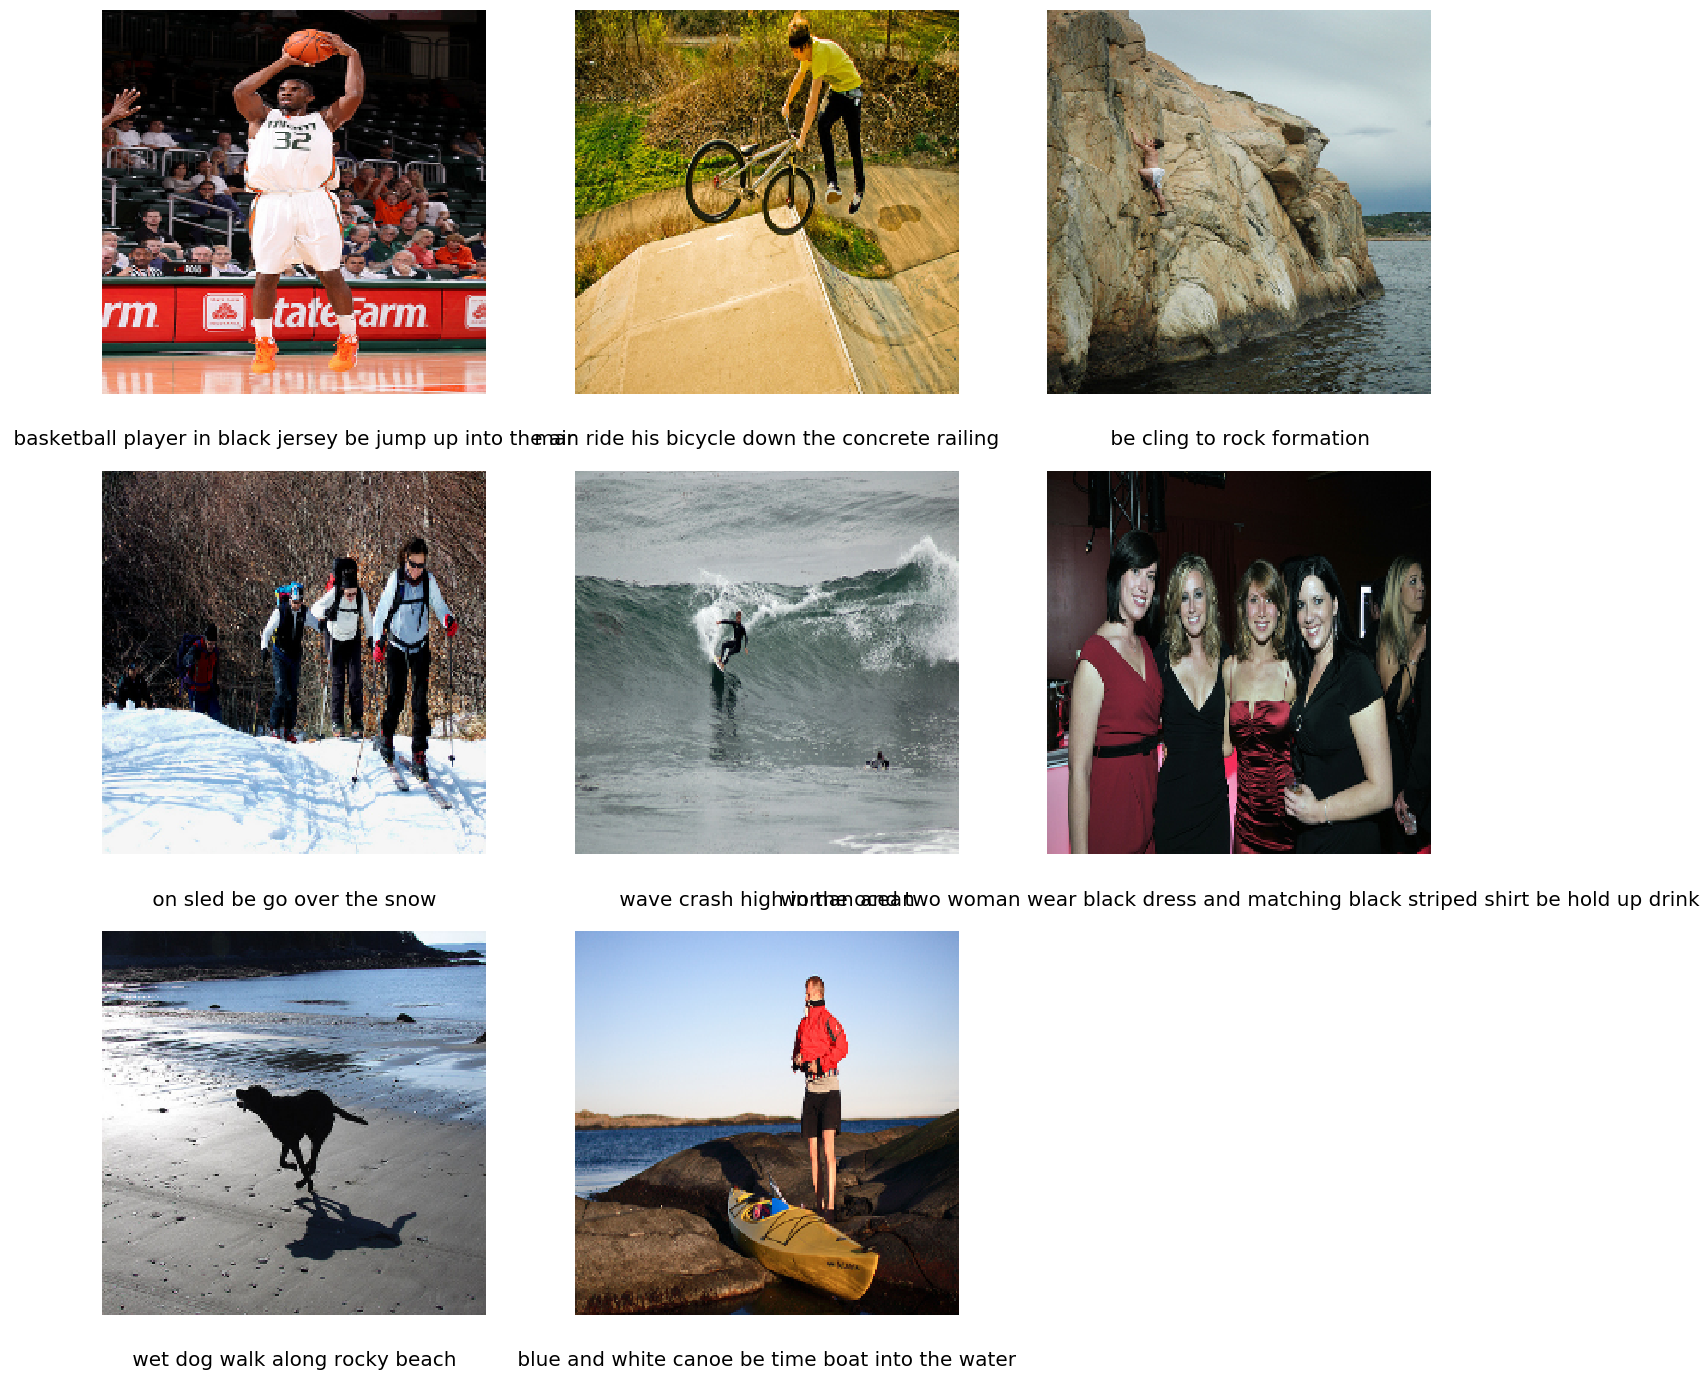

In [80]:
_=get_captions("images",3,mapping_more,demapping_more,model_more,k,ids1=good_result,no_pic=3)

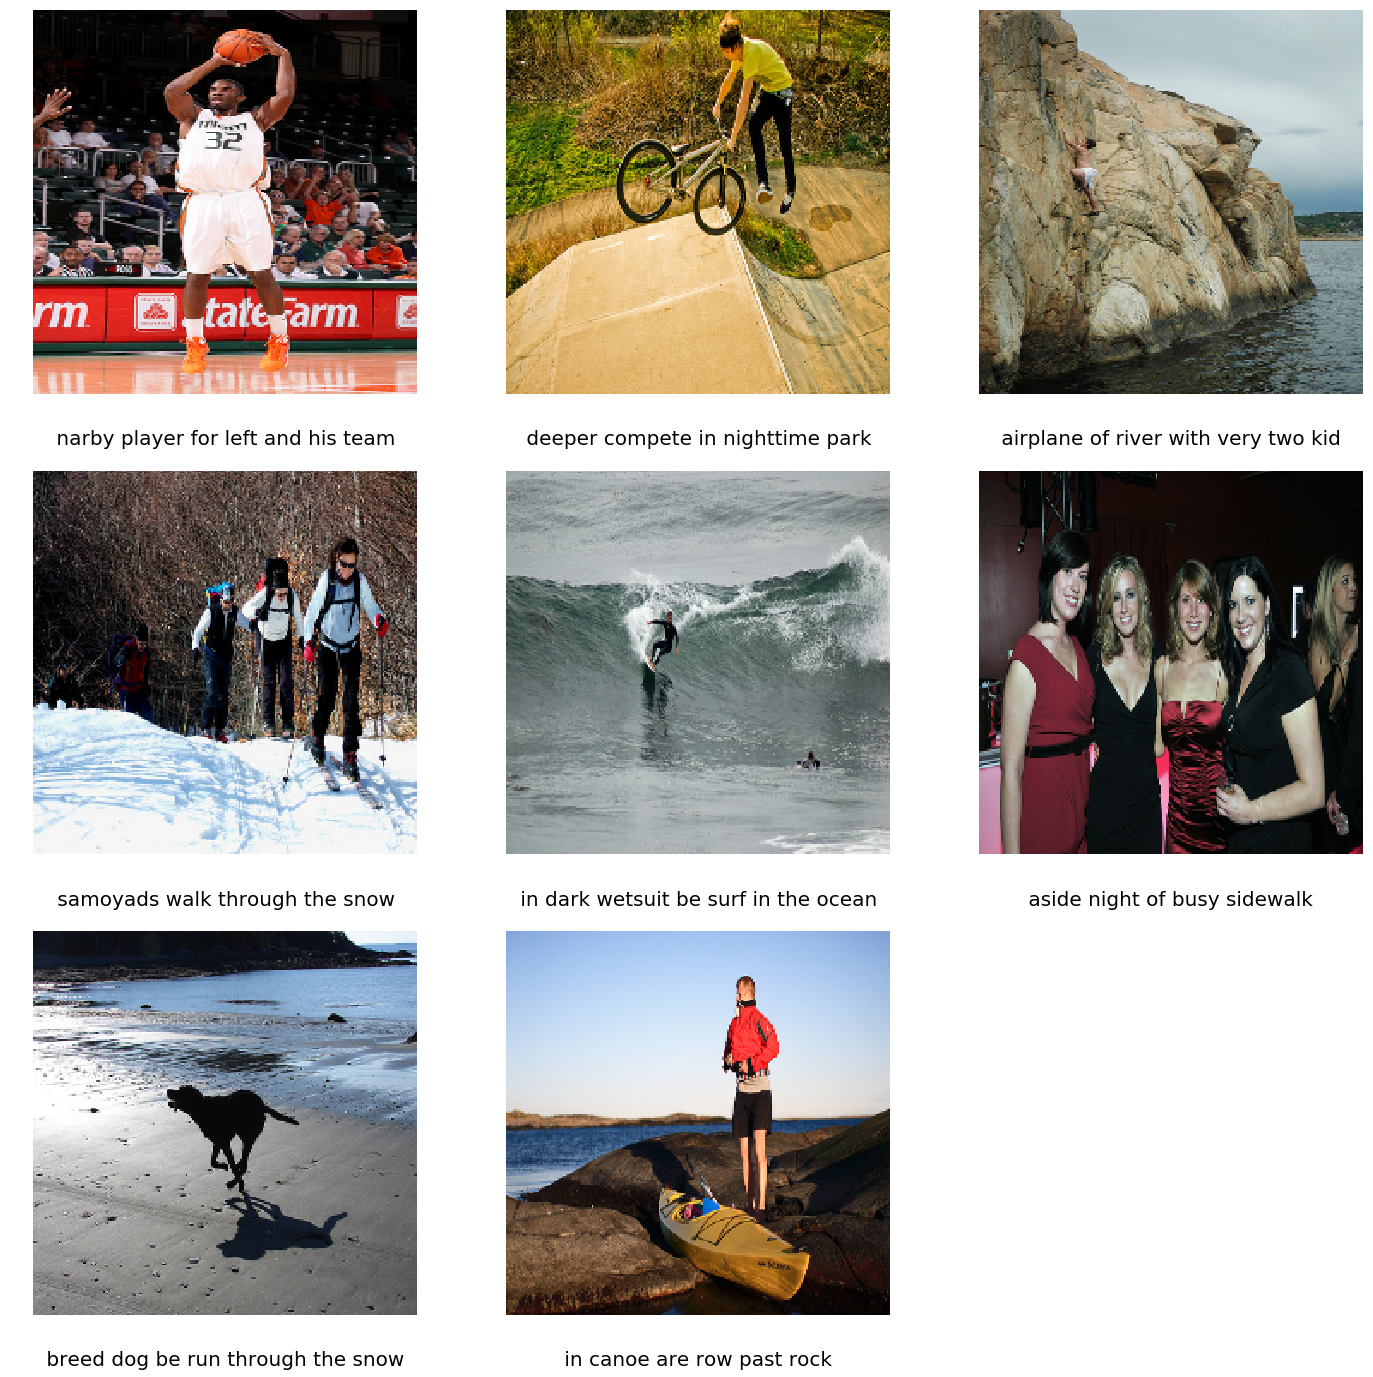

In [81]:
_=get_captions("images",3,mapping_less,demapping_less,model_less,k,ids1=good_result,no_pic=3)

['IMG_20170718_154236.jpg']

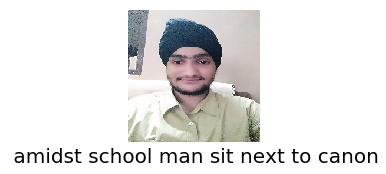

In [75]:
get_captions(".",1,mapping_less,demapping_less,model_less,k,ids1=['IMG_20170718_154236.jpg'])
get_captions(".",1,mapping_more,demapping_more,model_more,k,ids1=['IMG_20170718_154236.jpg'])